In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# Elbow method to determine the appropiate number of clusters
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import mplcursors

/var/folders/g3/ncfg5yhn47v7z7k0wmn723zc0000gn/T/ipykernel_3641/1411234924.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [31]:
def cluster_analysis(data: pd.DataFrame):
    # Create a 2x2 grid of figures for each label
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Create boxplot for each label
    for label in range(4):  # Assuming labels are 0, 1, 2, 3
        # Filter the data for the current label
        df_label = data[data['Labels'] == label]
        
        # Create boxplot for each column in the current label on the corresponding axis
        sns.boxplot(data=df_label.drop(columns='Labels'), ax=axes[label])
        
        # Set labels and title
        axes[label].set_xlabel('Columns (Q1-Q8)')
        axes[label].set_ylabel('Values')
        axes[label].set_title(f'Boxplot for Cluster {label}')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

In [33]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift

def do_clustering(data: pd.DataFrame, method: str = 'KMeans', **kwargs)->pd.Series:
    
    d_frame = data.copy()

    algorithms = {
        'KMeans': KMeans,
        'AgglomerativeClustering': AgglomerativeClustering,
        'DBSCAN': DBSCAN,
        'MeanShift':MeanShift
        # Add more clustering algorithms as needed
    }

    if method in algorithms:
        # Create the clustering algorithm object with specified parameters
        algorithm = algorithms[method](**kwargs)
        # Fit the algorithm to the data
        algorithm.fit(data)
        # Return the labels or clustering results
        if method == 'DBSCAN':
            return algorithm.labels_
        else:
            return algorithm.labels_.tolist()  # Convert labels to list for compatibility
    else:
        raise ValueError(f"Unsupported clustering algorithm: {method}")


In [25]:
#Import Data

data = pd.read_excel(r'/Users/familiadelasherasgarciahijosdanielnuriapablo/Documents/Applied Math and Data Science/Jovia/DeidentifiedSDOHPatientData-v1.xlsx')

data.sample(6)

# Drop id, age, race, ethnicity, gender
data.drop(columns = ['PatIdentifier','AgeAtAdmit', 'Race', 'Ethnicity', 'Gender'], inplace = True)

questions  = list(data.columns)

data.columns = [f'Q{i+1}' for i in range(len(list(data.columns)))]

questions_dict = dict(zip(data.columns, questions))

data.sample(6)

data.fillna('No Answer',inplace = True)

data.replace('Patient unable to answer', 'No Answer')

data.replace('Patient declined', 'No Answer')

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,Never True,Never True,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer
1,Never True,Never True,No,No,No,No,No,No Answer
2,Never True,Never True,No,No,No,No,No,No
3,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer
4,Never True,Never True,No,No,No,No,No,No Answer
...,...,...,...,...,...,...,...,...
15838,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer
15839,Never True,Never True,No,No,No,No,No,No Answer
15840,Never True,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer
15841,Never True,Never True,No,No,No,No,No,No Answer


In [27]:
# One-hot encoding for the categorical columns
encoder = OneHotEncoder(sparse_output = False)
data = encoder.fit_transform(data)

col_one_hot = list(encoder.get_feature_names_out())
# Convert the one-hot encoded array into a DataFrame with the created column names
data = pd.DataFrame(data, columns=col_one_hot)


**Agglomerative Clustering**

Elbow Method to determine the number of clusters to be formed:


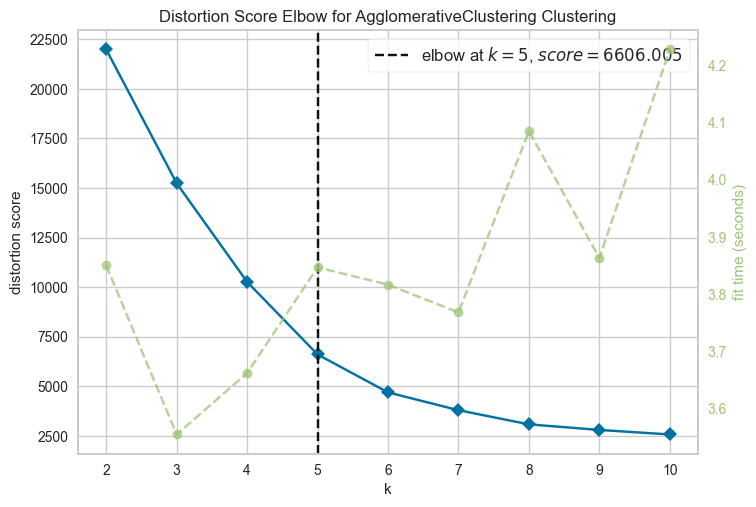

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(data)
Elbow_M.show()

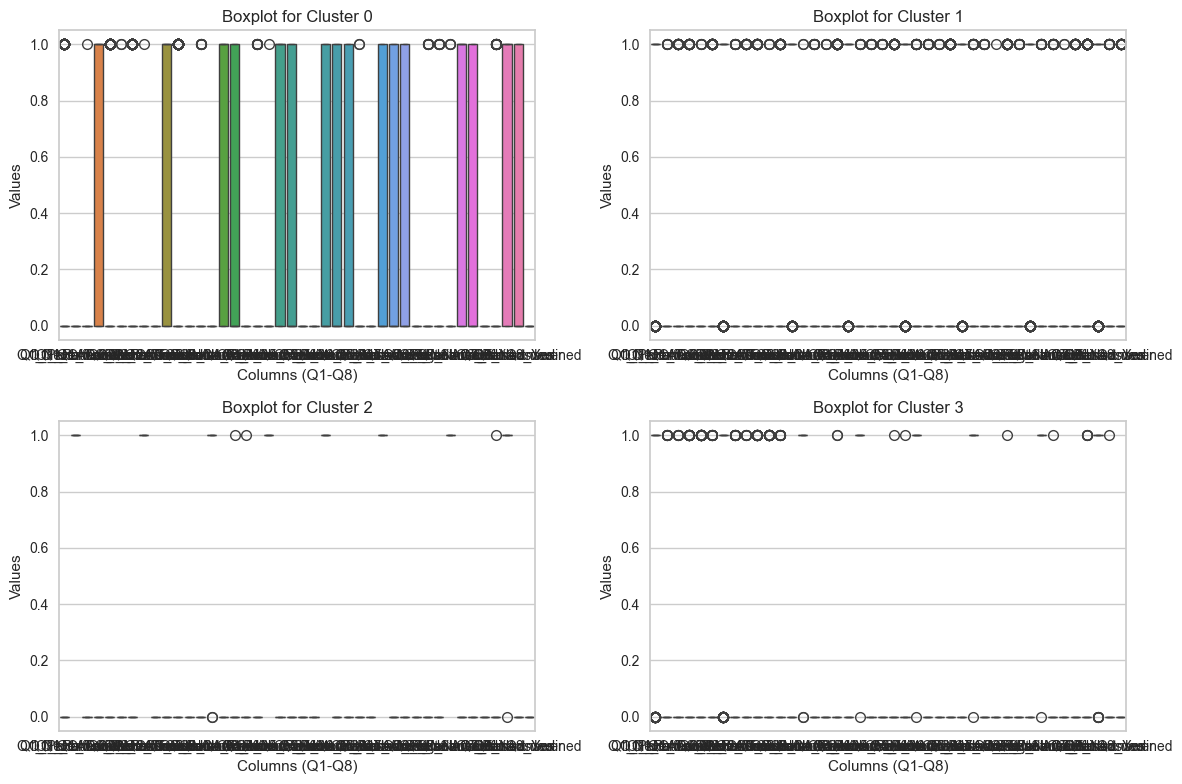

In [34]:
ac_data = data.copy()

ac_data['Labels']=do_clustering(ac_data, 'AgglomerativeClustering', n_clusters=5)

cluster_analysis(ac_data)

In [21]:
'''def summary_clusters(data:pd.DataFrame)->pd.DataFrame:'''
    

15824.178758946851

In [35]:
#pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.8 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Create a sample binary dataset
data = {'A': [1, 1, 0, 0, 1],
        'B': [1, 0, 1, 0, 1],
        'C': [0, 1, 0, 1, 1],
        'D': [1, 0, 1, 1, 0]}
df = pd.DataFrame(data)

# Convert binary values to strings ('1' for present, '0' for absent)
#df = df.astype(bool)

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Print the association rules
print("Association Rules:")
print(rules)


Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/Users/familiadelasherasgarciahijosdanielnuriapablo/anaconda3/envs/MTH695/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
